In [1]:
import pandas_datareader as web 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import pandas as pd
import os 

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
# set paths and create dirs 
base_dir = '../'
helper_dir = os.path.join(base_dir, 'helper')

In [3]:
# load helper functions
%run {helper_dir}/plot.py

## Download Daily Adj Close Prices and Calculate Yearly Returns

In [4]:
# get 10 years of data 
end = dt.datetime.now()
start = dt.datetime(end.year-10, end.month, end.day) 

In [5]:
assets = ['^GSPC', '^IXIC', 'FREL', 'GLD', 'COMT', 'BTC-USD', 'ETH-USD', 'AVAX-USD', 'ATOM-USD', 'NEAR-USD', 
          'DOGE-USD', 'UNI1-USD', 'CRV-USD', 'CVX-USD', 'FXS-USD']
names = {'^GSPC':'S&P 500', '^IXIC':'NASDAQ Composite', 'FREL':'Real Estate (Fidelity MSCI ETF)', 'GLD':'Gold', 
         'COMT':'Commodities (iShares GSCI ETF)', 'BTC-USD':'BTC', 'ETH-USD':'ETH', 'AVAX-USD':'Avalanche', 
         'ATOM-USD':'ATOM', 'NEAR-USD':'NEAR', 'DOGE-USD':'DOGE', 'UNI1-USD':'UNI (Uniswap)', 
         'CRV-USD':'CRV (Curve)', 'CVX-USD':'CVX (Convex)', 'FXS-USD':'FXS (Frax)'}

In [6]:
prices = web.get_data_yahoo(assets, start, end)['Adj Close']
returns = prices.pct_change().resample('Y').agg(lambda x: (x+1).prod()-1)
returns.head()

Symbols,^GSPC,^IXIC,FREL,GLD,COMT,BTC-USD,ETH-USD,AVAX-USD,ATOM-USD,NEAR-USD,DOGE-USD,UNI1-USD,CRV-USD,CVX-USD,FXS-USD
Date,,,,,,,,,,,,,,,
2012-12-31,-0.0232,-0.0432,0.0000,-0.0542,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2013-12-31,0.2960,0.3832,0.0000,-0.2833,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2014-12-31,0.1139,0.1340,0.0000,-0.0219,-0.1763,-0.2999,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-12-31,-0.0073,0.0573,-0.0473,-0.1067,-0.3036,0.3447,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-12-31,0.0954,0.0750,0.0660,0.0803,0.2101,1.2383,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## Visualize Yearly Returns

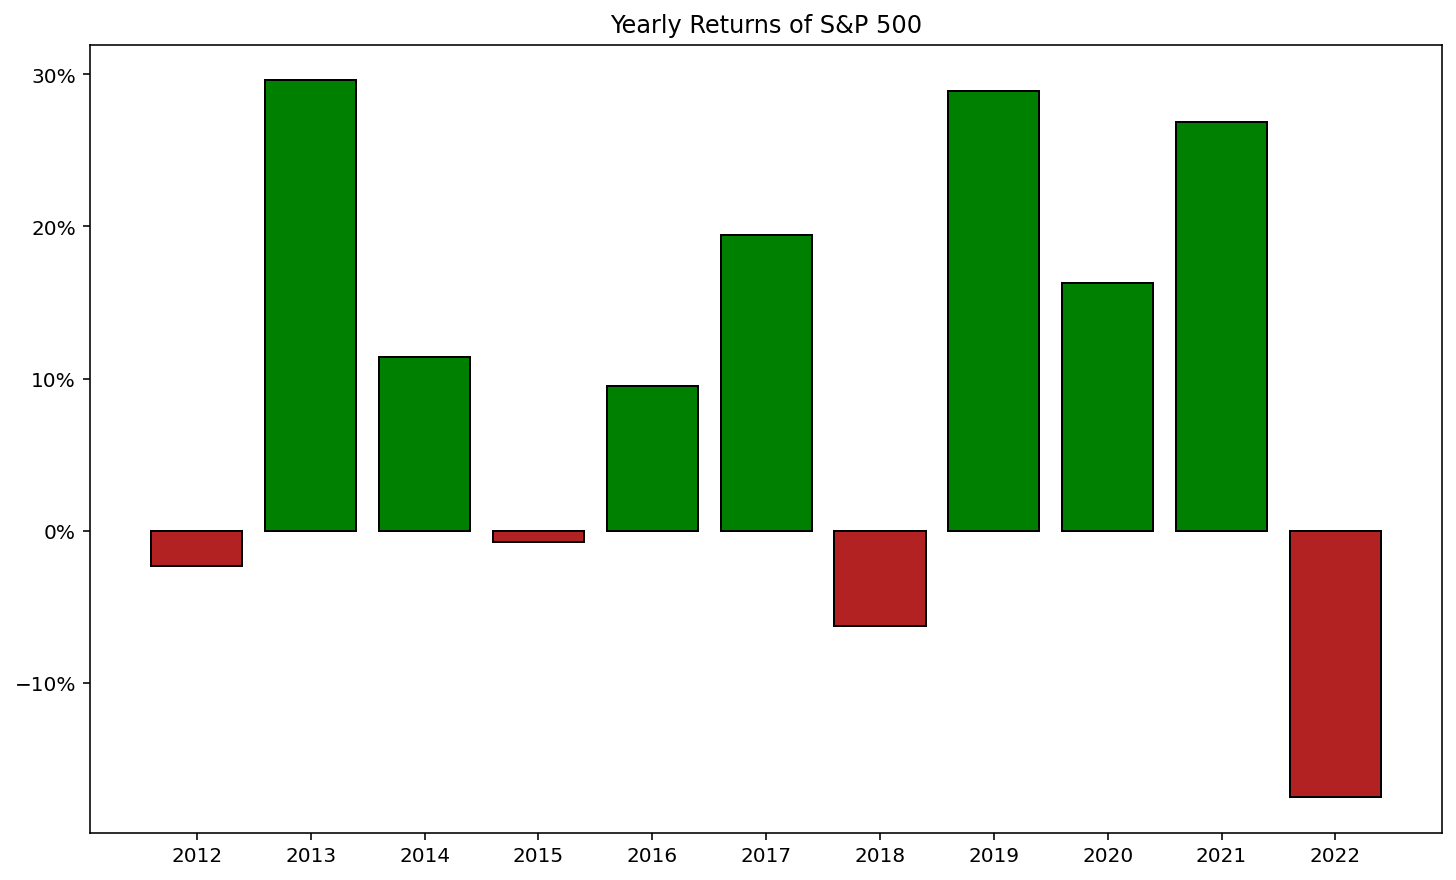

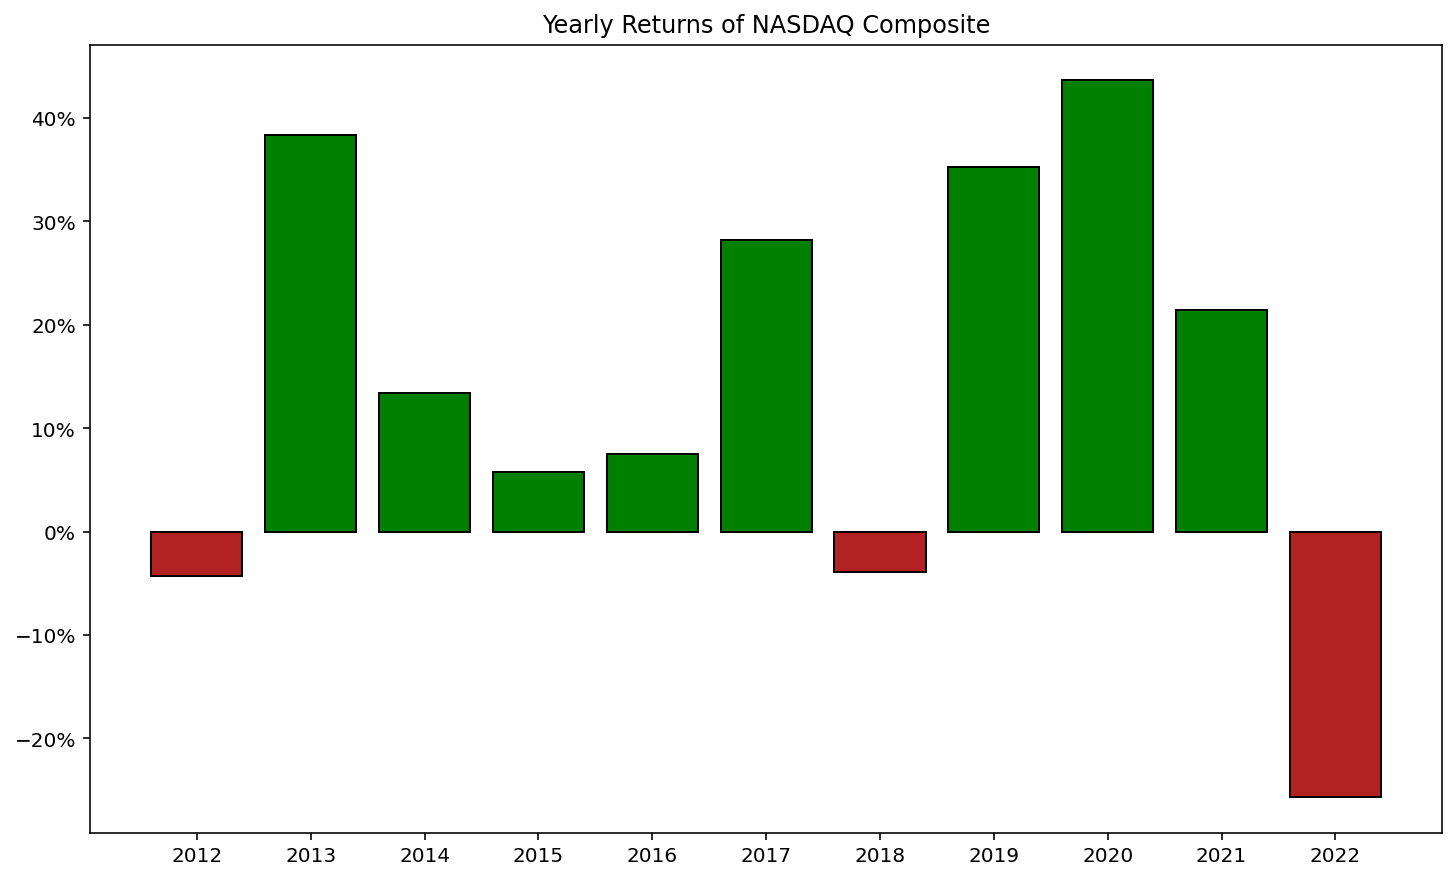

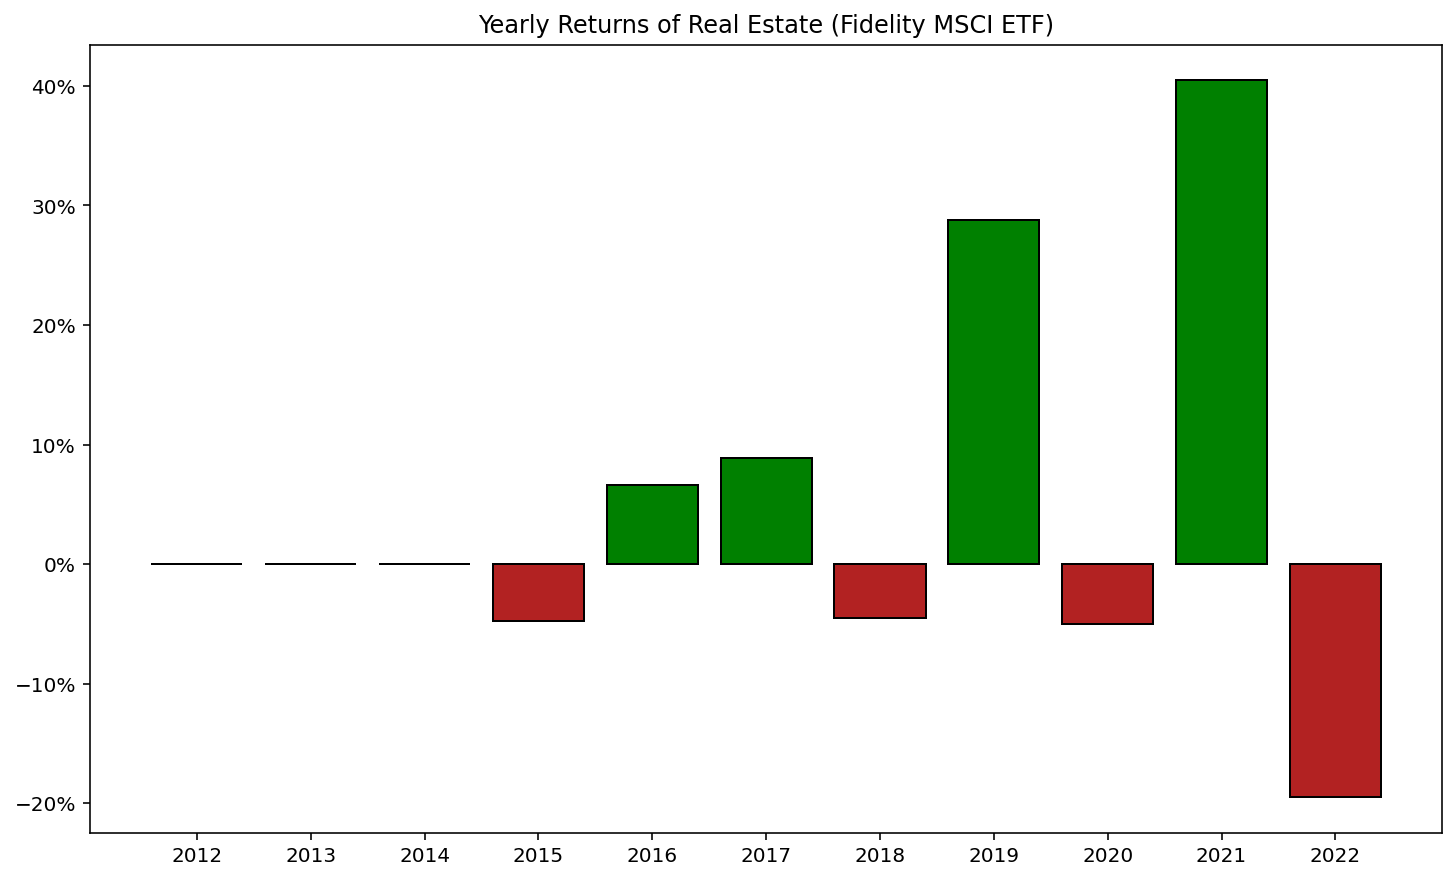

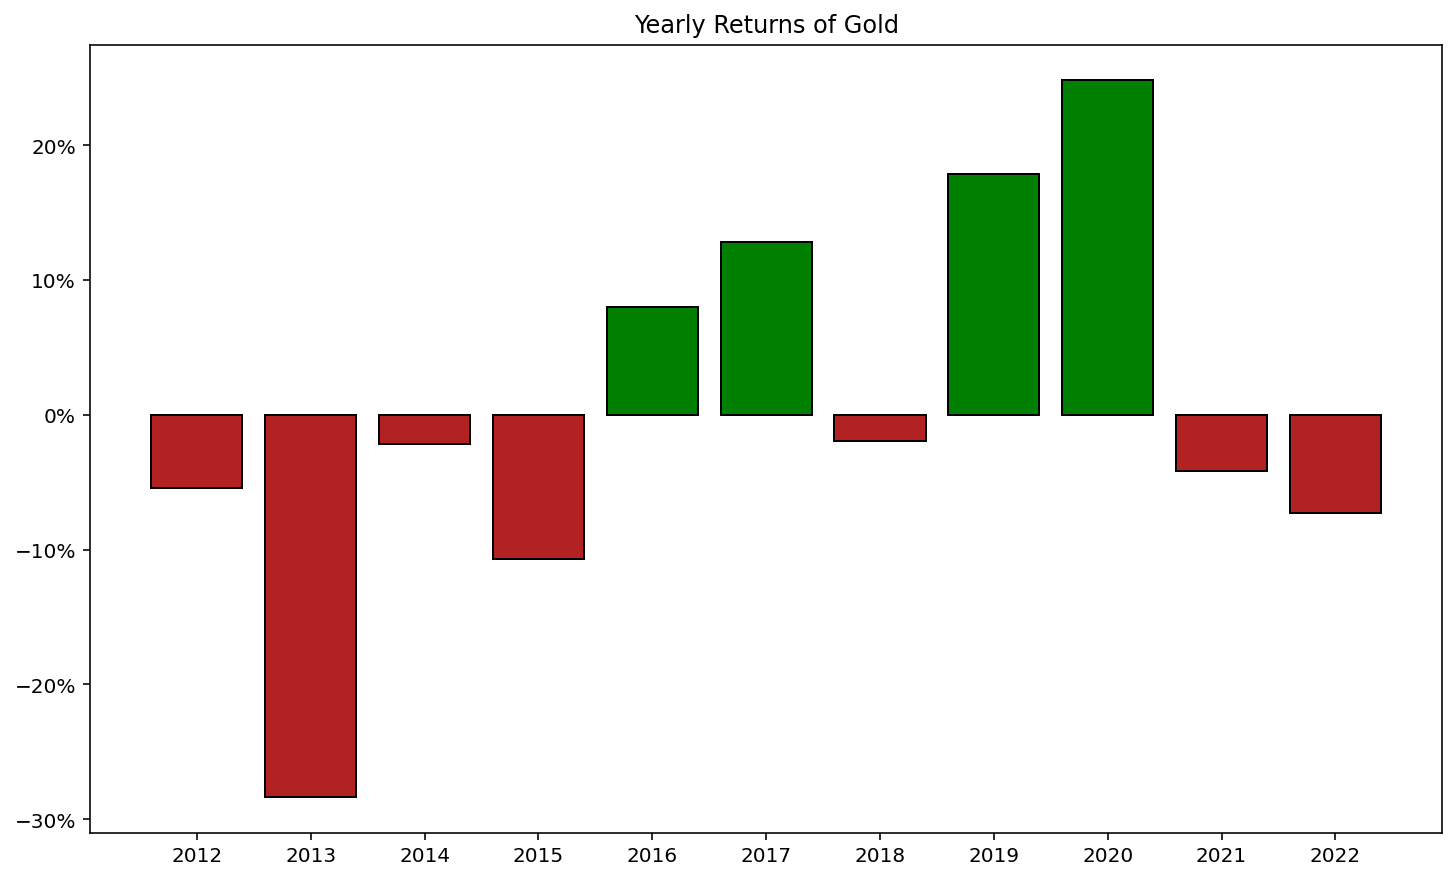

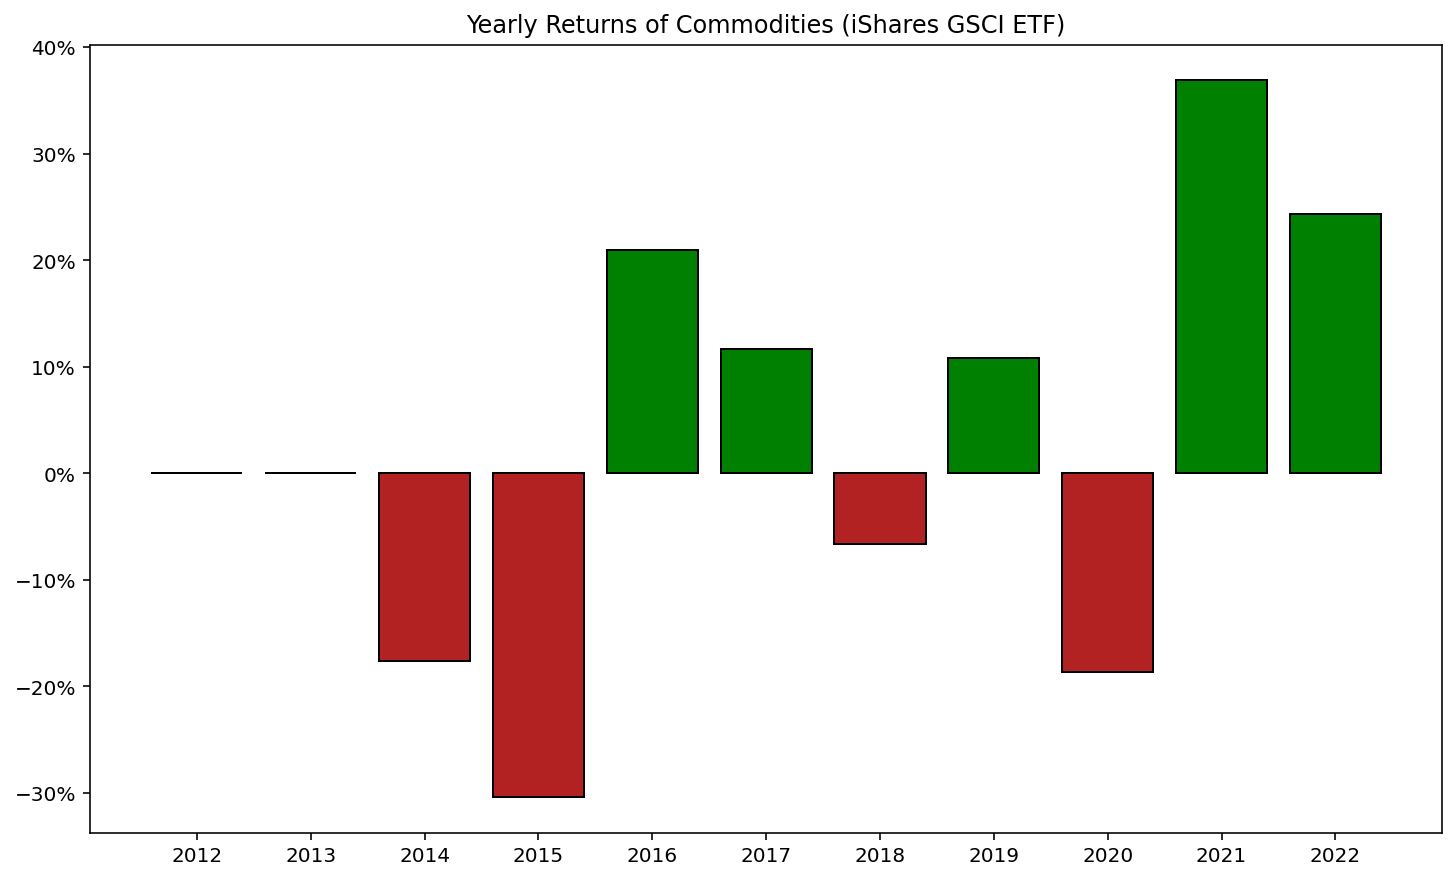

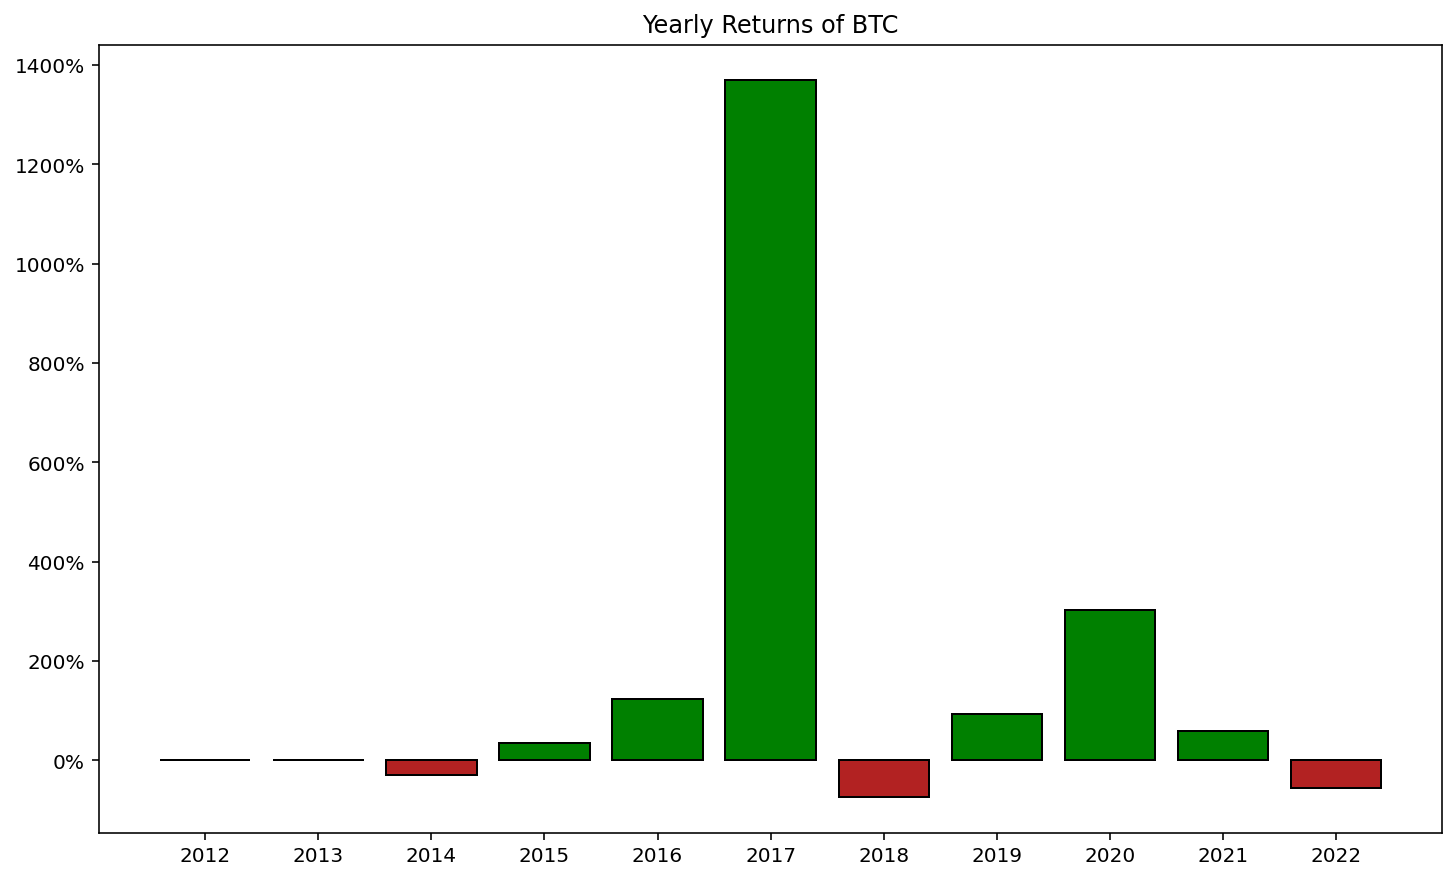

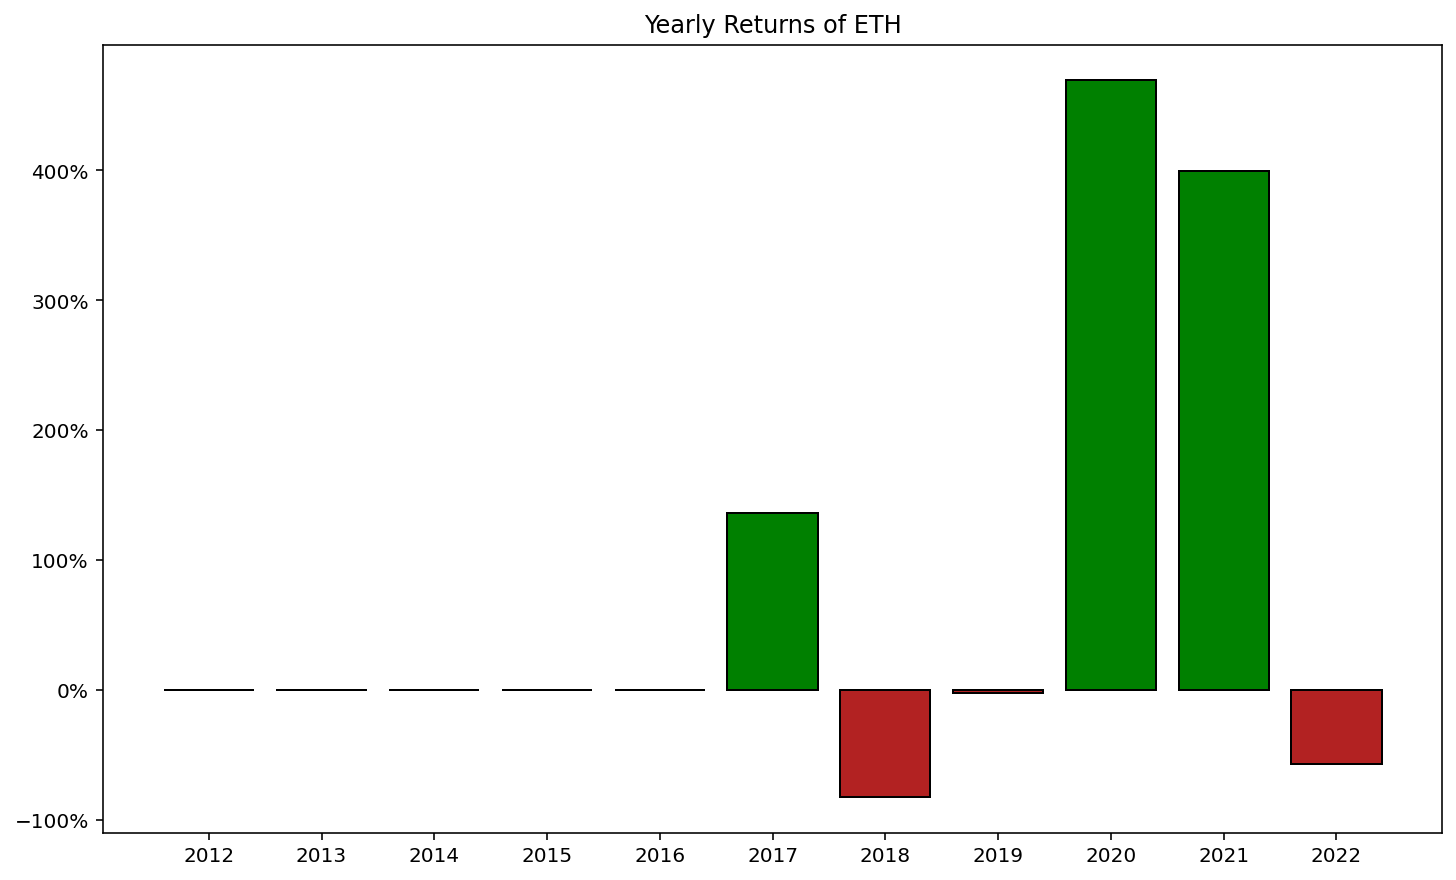

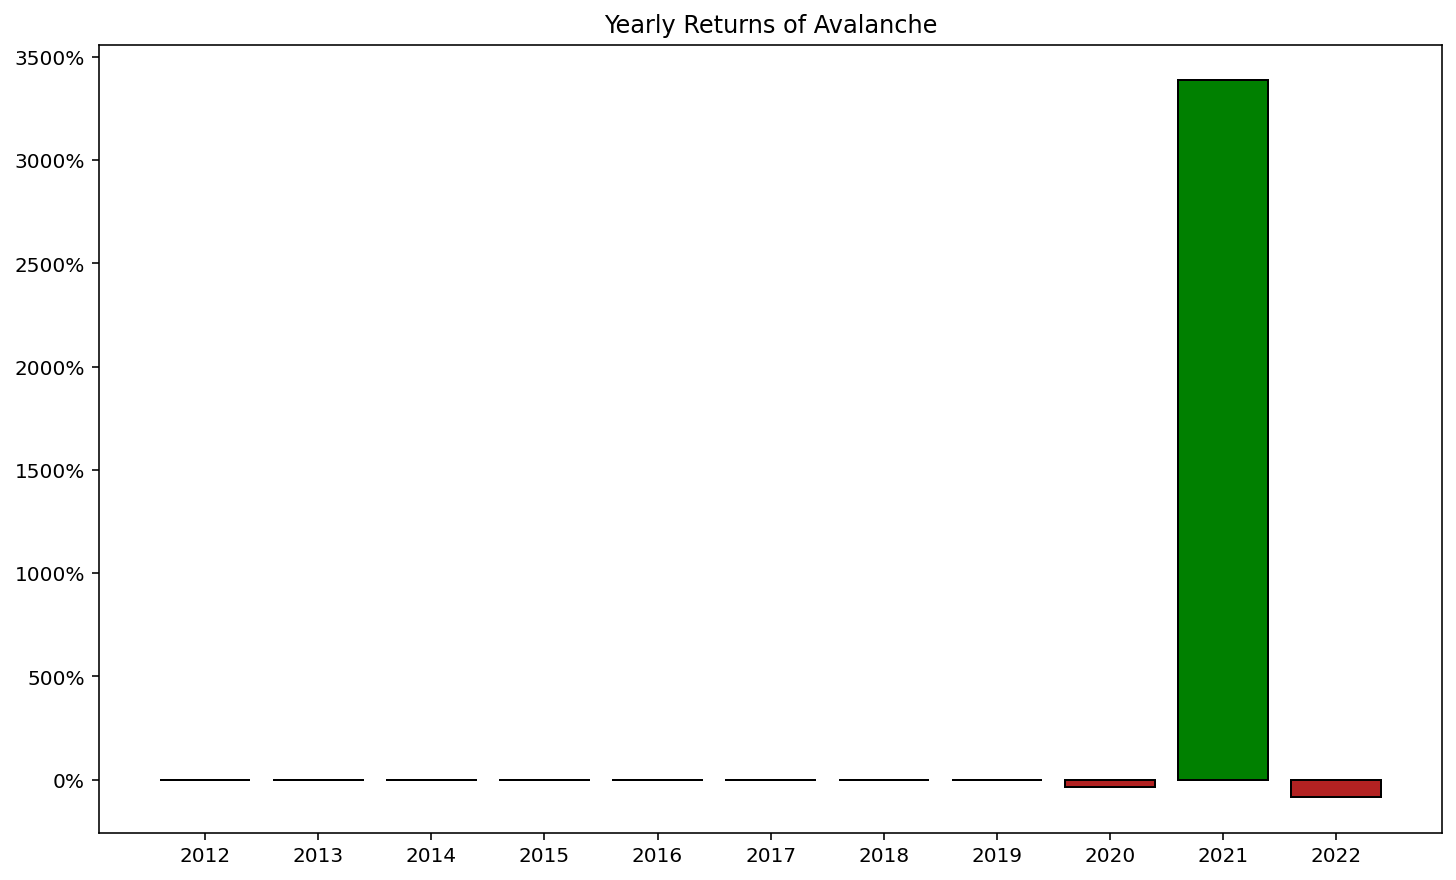

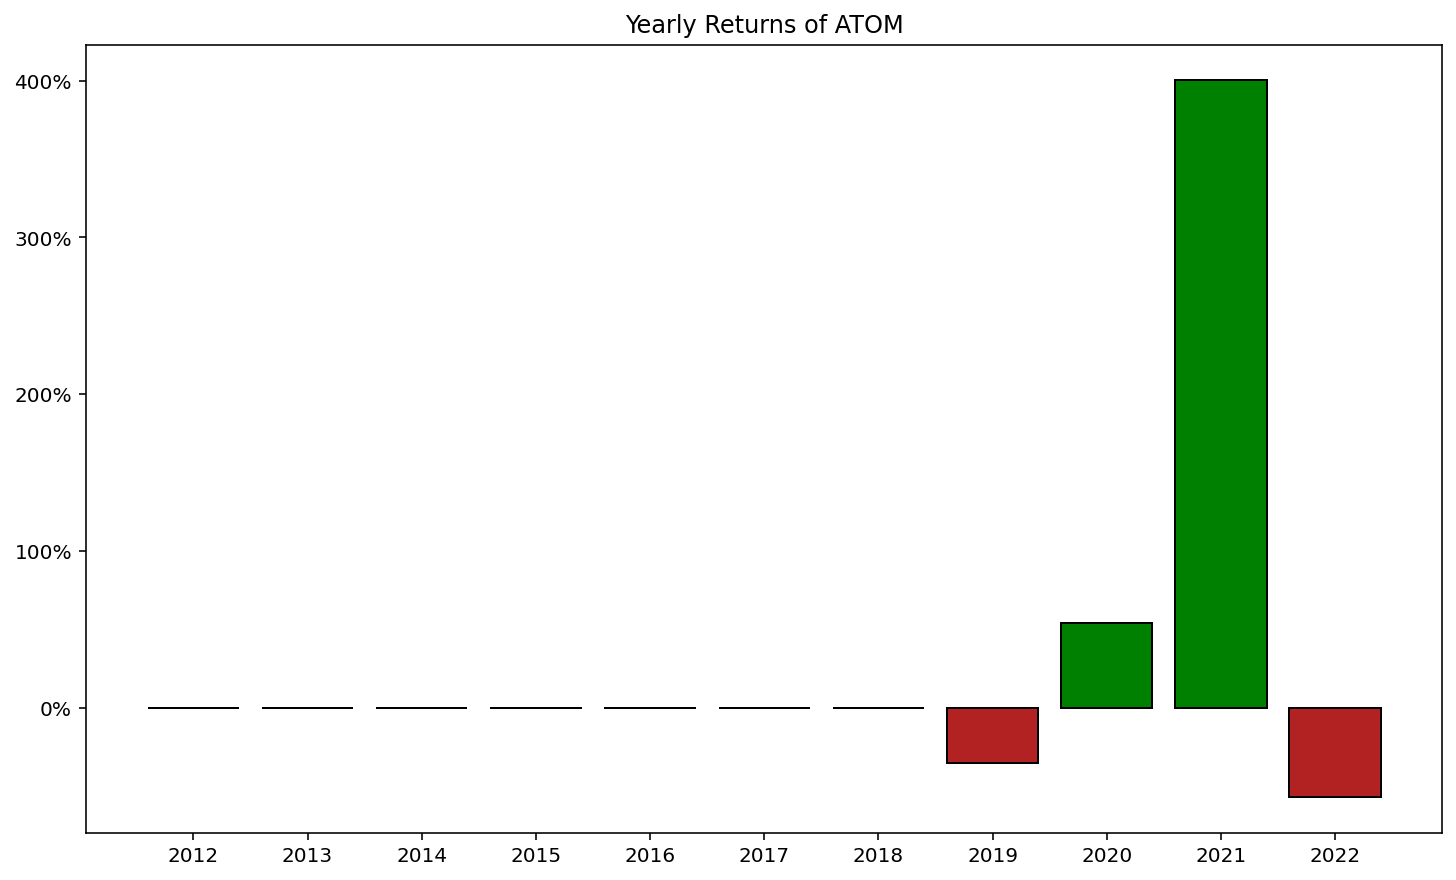

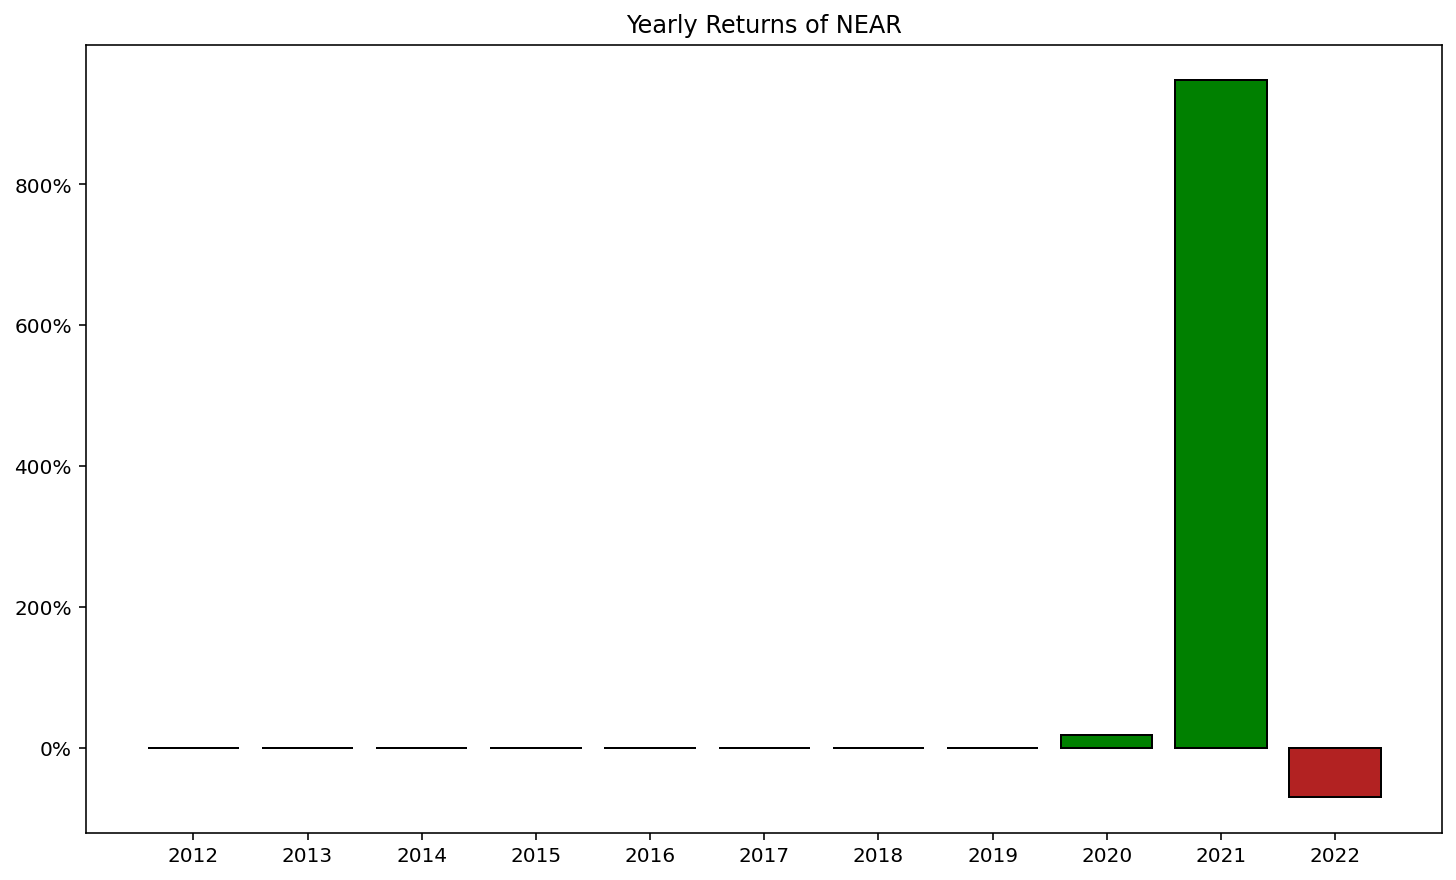

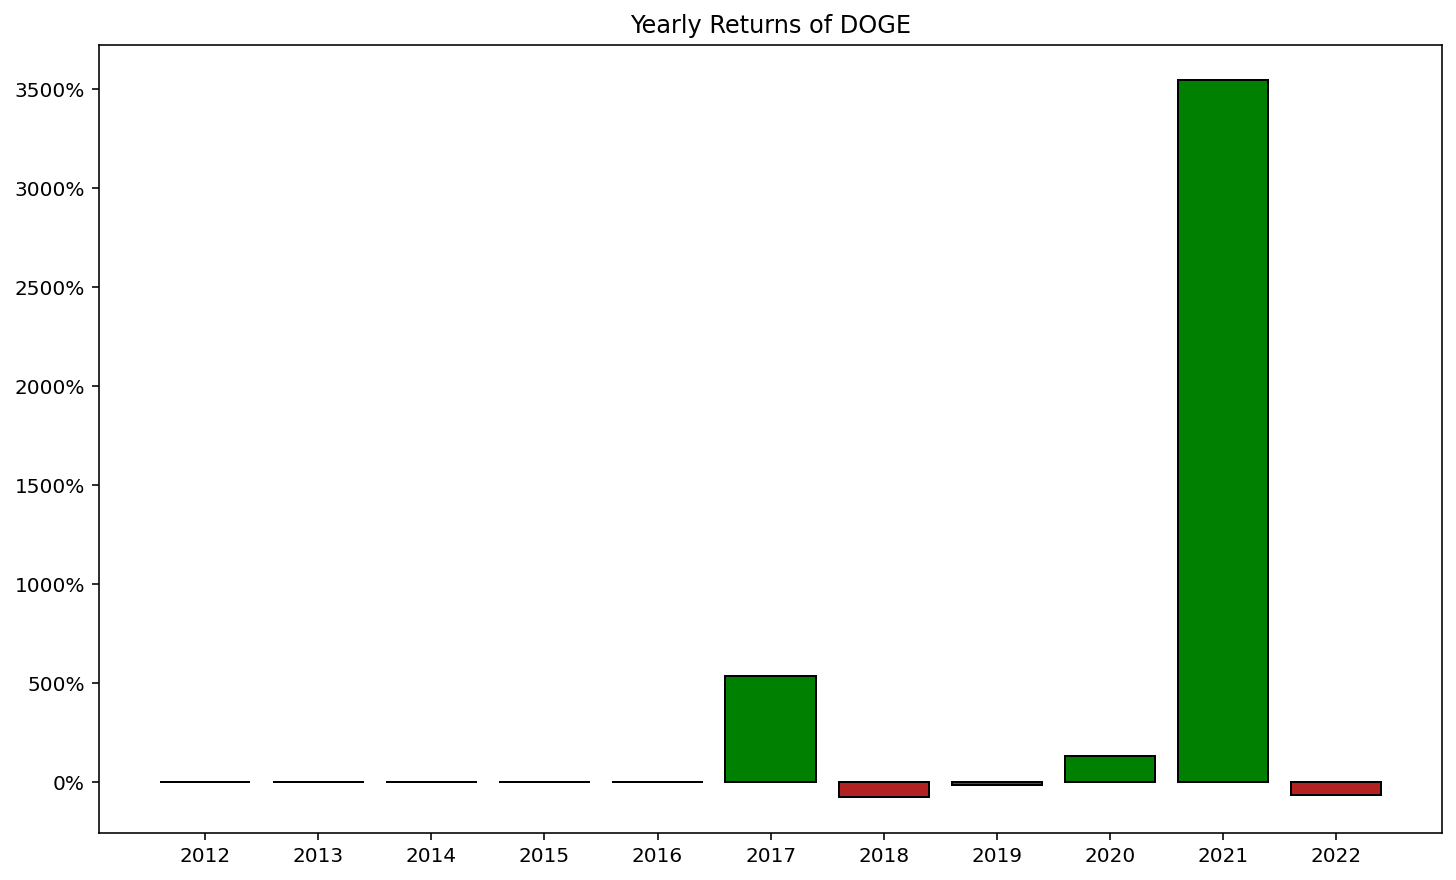

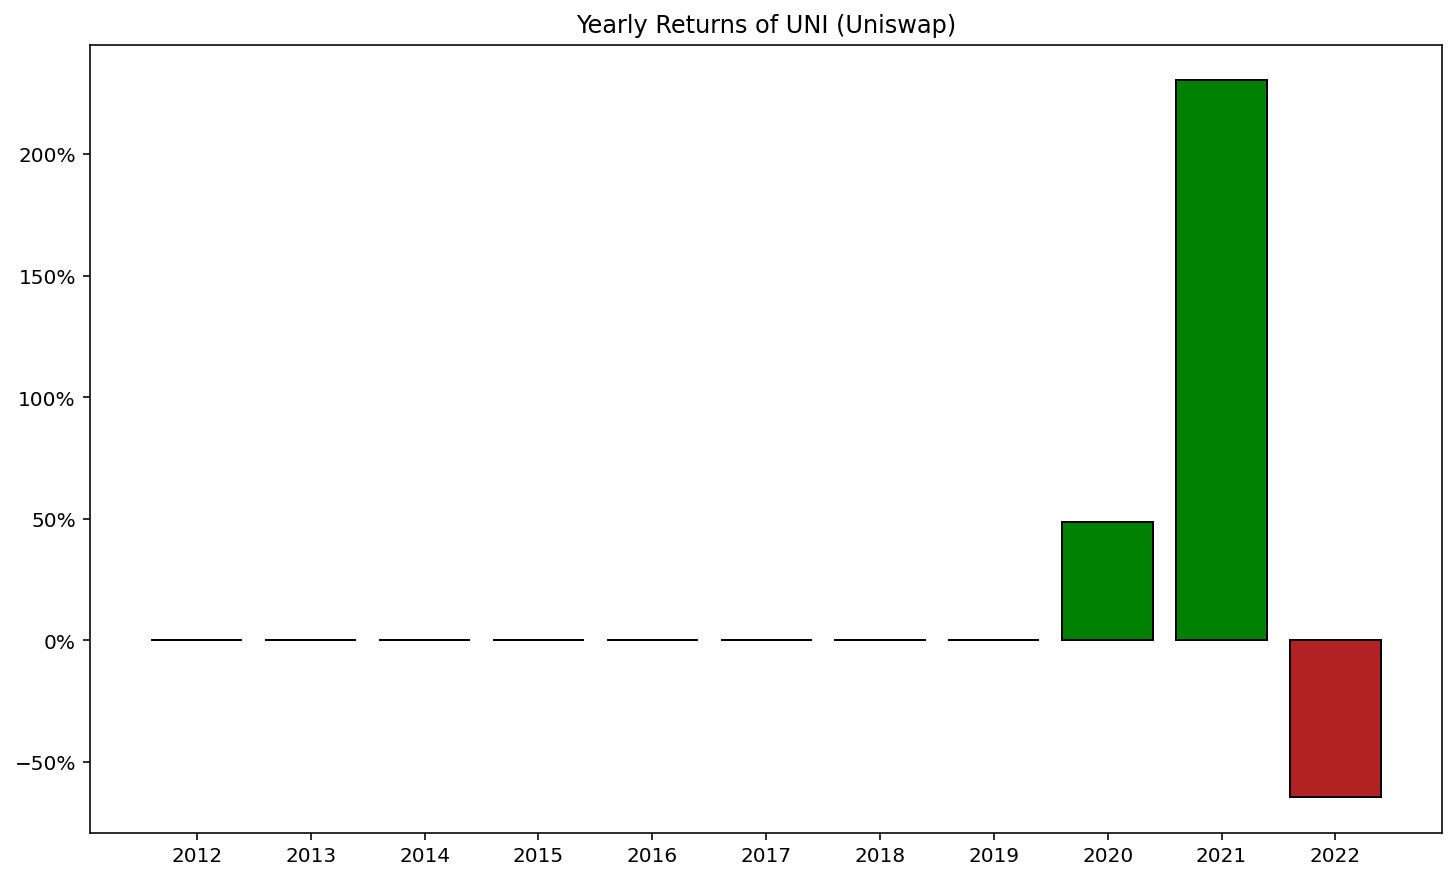

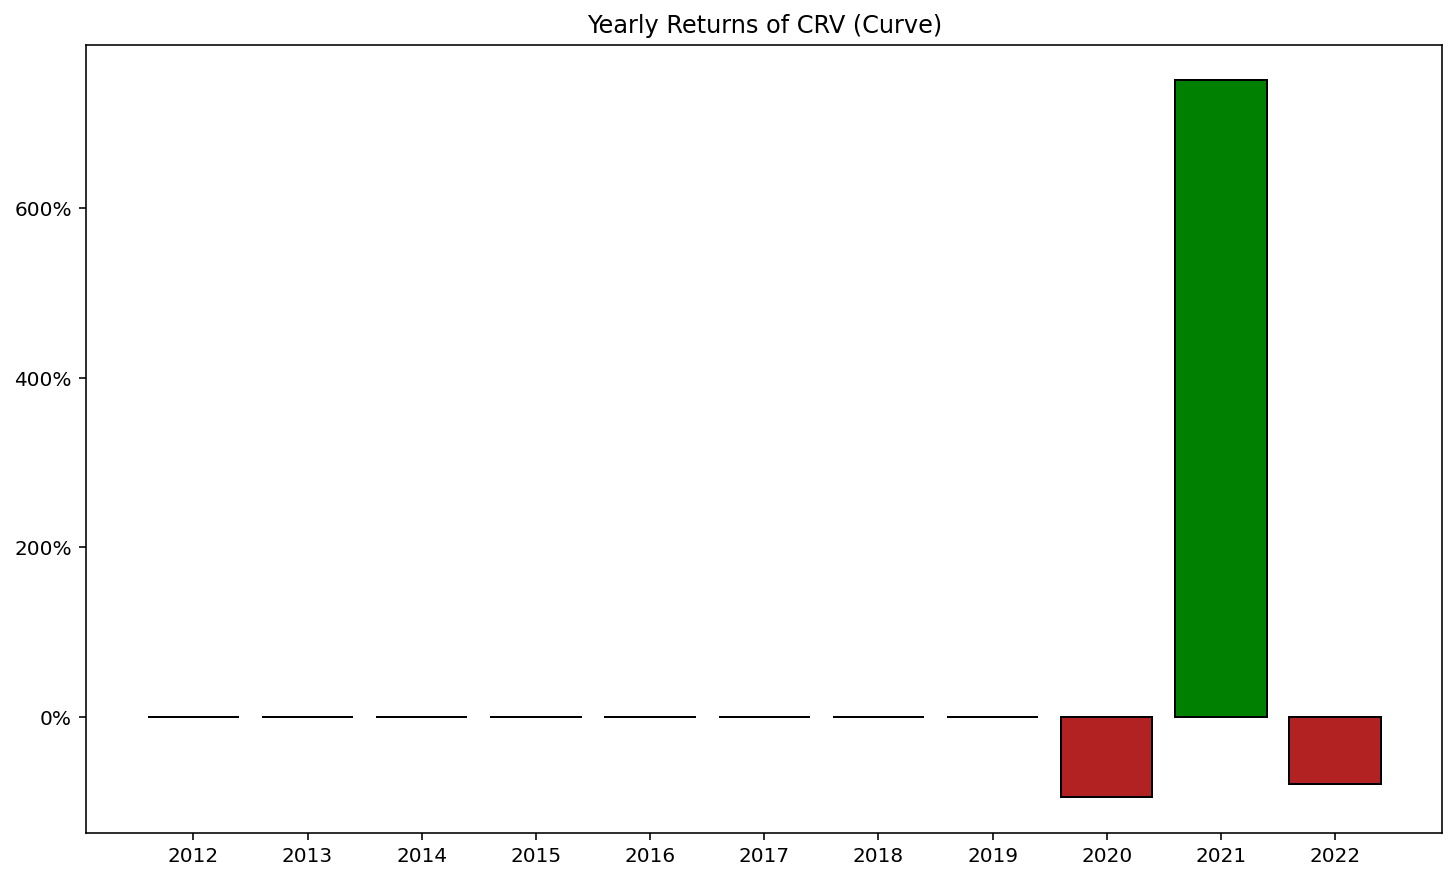

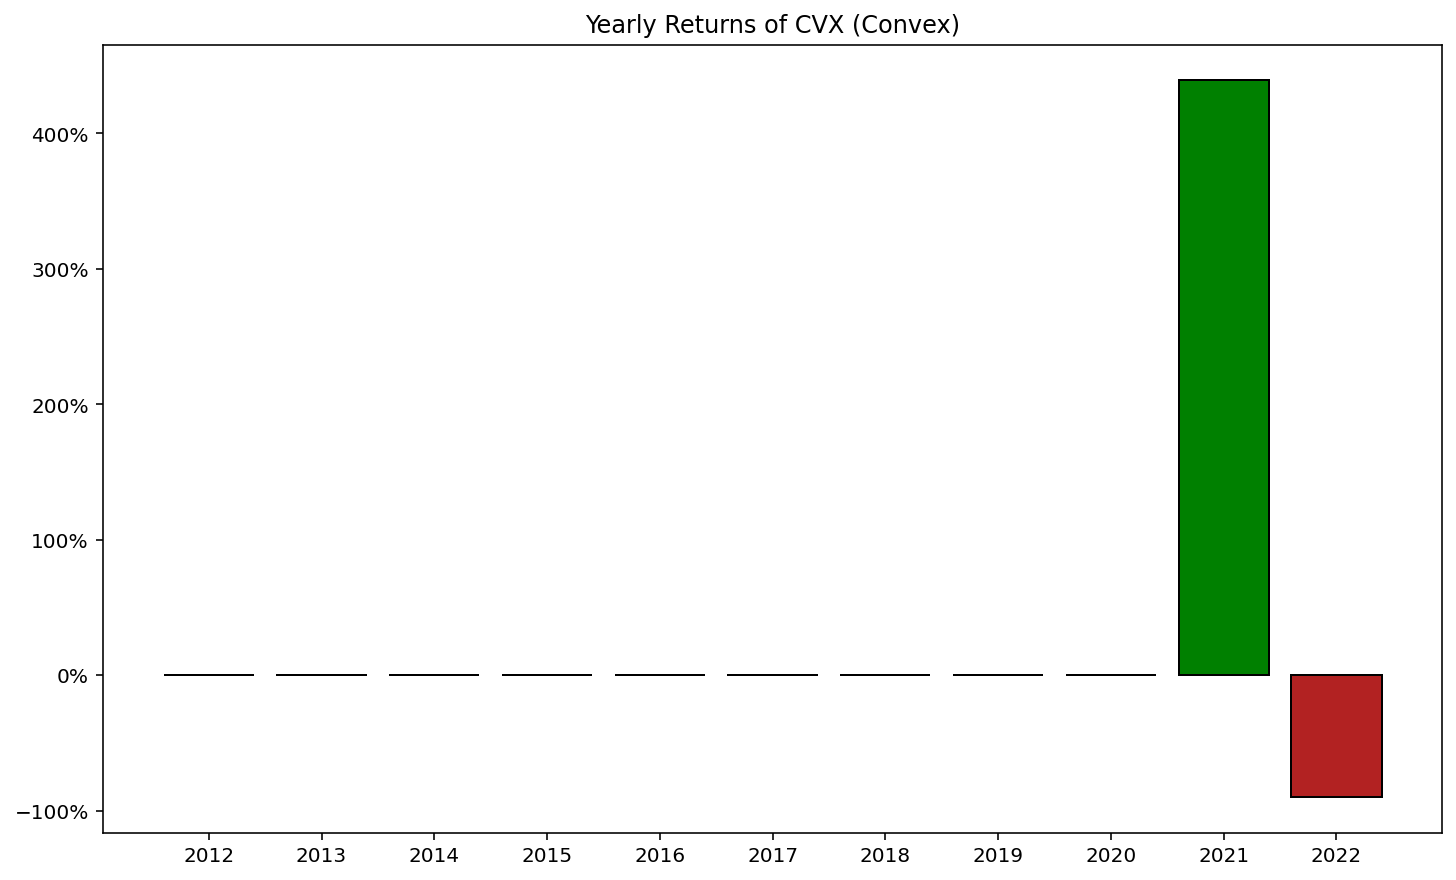

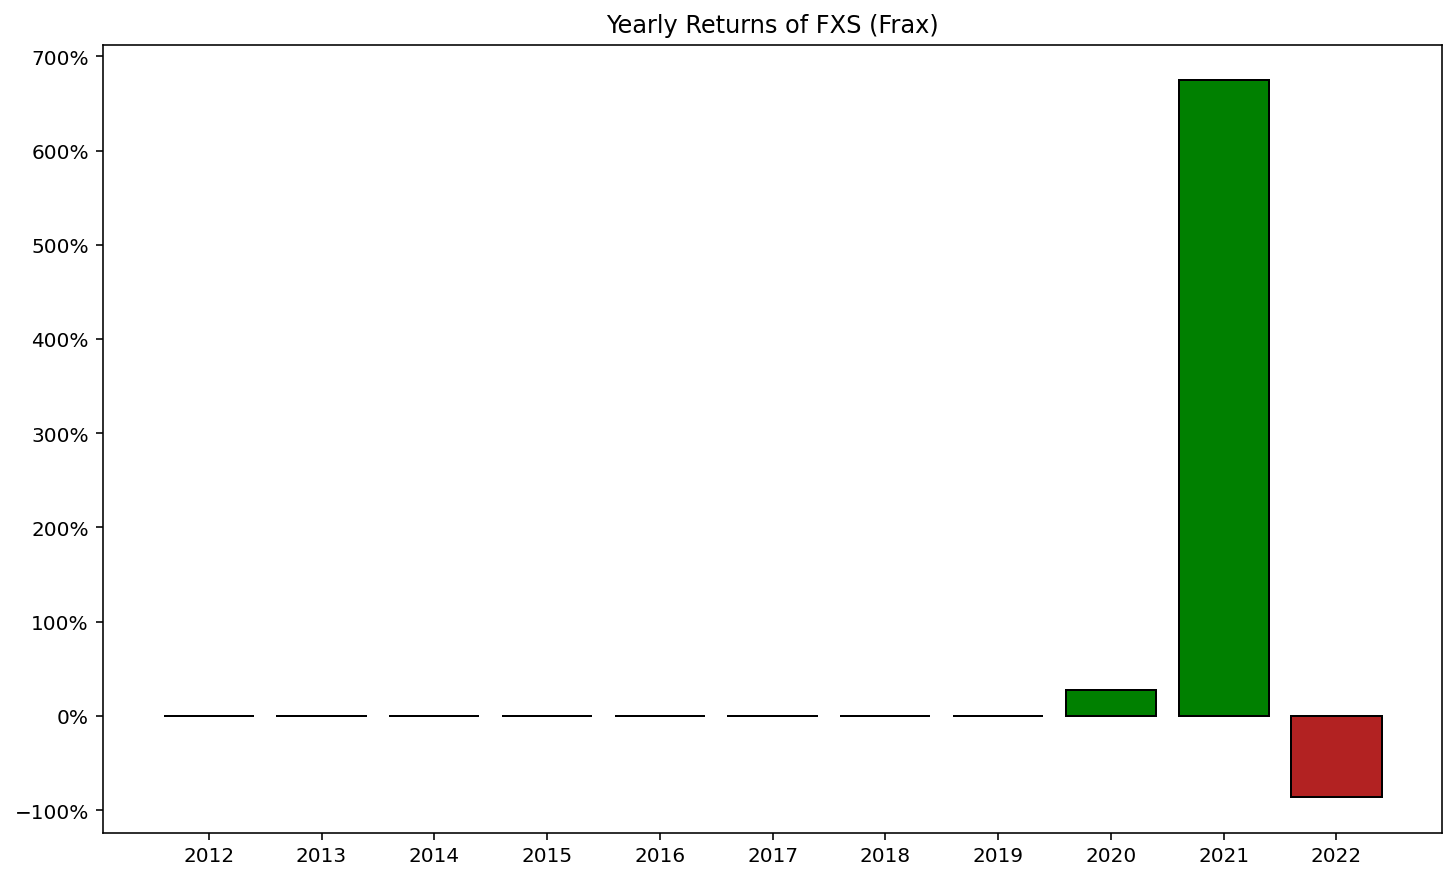

In [7]:
for yvar in returns.columns:
    y = returns[yvar]
    y.name = ''
    x = returns.index.year
    x.name = ''
    name = names[yvar]
    fig_tit = f'Yearly Returns of {name}'
    ax = plot_simple_bars(x, y, title=fig_tit)
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    # plt.savefig(os.path.join(png_dir, fig_tit+'.png'), dpi=300)